# Automatically find peaks in the spectrum

## Imports

Standard library imports

In [1]:
from pathlib import Path
from typing import Union

Third-party  imports

In [74]:
import numpy as np
import scipy.signal as si
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from astropy.table import Table
from astropy.wcs import WCS
from astropy.io import fits
import seaborn as sns
import cmasher as cmr
from mpdaf.obj import Cube, Image, Spectrum
import regions as rg

sns.set_context("talk")

Will's libraries

In [3]:
import wcsfile

## Paths for data files

Files in `small_data_path` should not be too large to be checked into git

In [4]:
data_path = Path.cwd().parent.parent / "big-data" / "ngc346new"
small_data_path = Path.cwd().parent.parent / "data"

## Read in data files

In [36]:
cube = Cube(str(data_path / "n346-muse-csub-101.fits"))

Switch to reading the fits files directly

In [37]:
star_mask = fits.open(small_data_path / "n346-mask-stars.fits")[1].data
yso_mask = fits.open(small_data_path / "n346-mask-yso.fits")[1].data

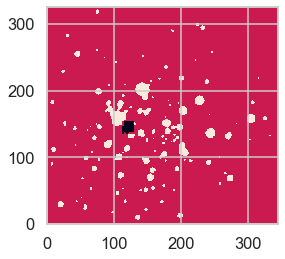

In [38]:
Image(data=star_mask - yso_mask).plot()

In [65]:
mask = np.where(yso_mask > 0.0, 1.0, np.nan)
spec_yso = np.nanmean(cube.data * mask[None, :, :], axis=(1, 2))

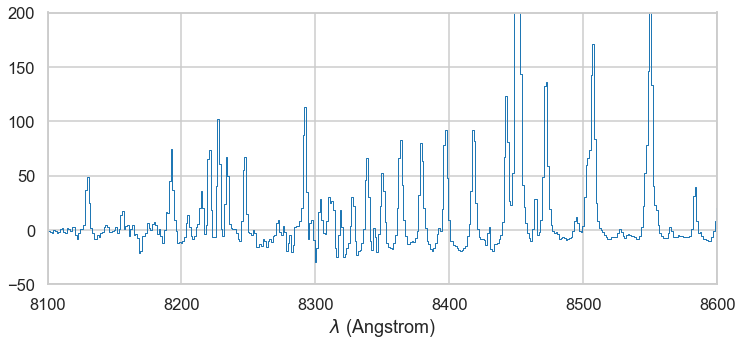

In [69]:
fig, ax = plt.subplots(figsize=(12, 5))
Spectrum(data=spec_yso, wave=cube.wave).plot()
ax.set_ylim(-50, 200)
ax.set_xlim(8100, 8600)
...;

In [70]:
mask = np.where(yso_mask + star_mask == 0.0, 1.0, np.nan)
spec_all = np.nanmean(cube.data * mask[None, :, :], axis=(1, 2))

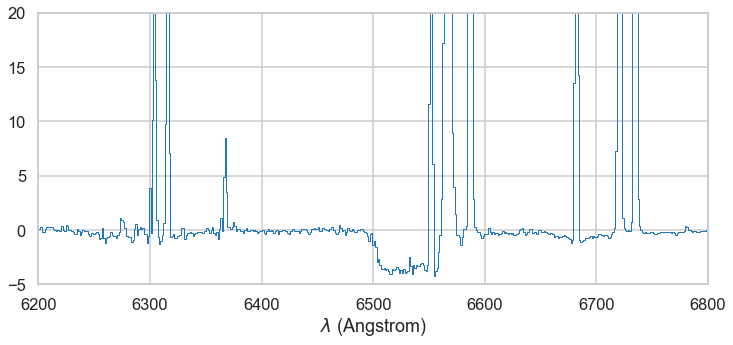

In [72]:
fig, ax = plt.subplots(figsize=(12, 5))
Spectrum(data=spec_all, wave=cube.wave).plot()
ax.set_ylim(-5, 20)
ax.set_xlim(6200, 6800)
...;

In [123]:
peaks, props = si.find_peaks(spec_yso, prominence=5.0,   distance=4)

In [124]:
peaks

array([   7,   25,   48,   56,   77,   83,   92,  105,  109,  126,  138,
        142,  174,  182,  190,  197,  211,  227,  234,  246,  260,  267,
        280,  289,  293,  301,  311,  323,  328,  335,  347,  355,  360,
        367,  379,  391,  403,  412,  428,  439,  449,  458,  475,  481,
        498,  510,  532,  539,  562,  576,  589,  613,  623,  669,  675,
        718,  732,  737,  744,  753,  766,  781,  809,  827,  861,  896,
        920,  926,  998, 1023, 1030, 1035, 1045, 1068, 1089, 1106, 1160,
       1180, 1213, 1230, 1241, 1261, 1300, 1314, 1321, 1339, 1353, 1363,
       1372, 1377, 1400, 1414, 1420, 1430, 1456, 1470, 1478, 1488, 1497,
       1502, 1510, 1516, 1525, 1536, 1552, 1561, 1573, 1590, 1624, 1639,
       1656, 1665, 1683, 1696, 1708, 1745, 1774, 1813, 1817, 1822, 1830,
       1836, 1842, 1849, 1857, 1861, 1867, 1877, 1884, 1895, 1913, 1925,
       1931, 1935, 1945, 1958, 1969, 1975, 1986, 1997, 2003, 2012, 2032,
       2047, 2056, 2066, 2071, 2079, 2102, 2111, 21

In [125]:
props['prominences']

array([1.68108005e+01, 2.40536437e+01, 2.31384131e+02, 6.83631005e+00,
       9.63549171e+00, 7.60321765e+01, 1.89472286e+01, 8.91202264e+00,
       2.82941151e+01, 4.32880842e+01, 1.32350894e+01, 2.22165322e+01,
       1.11534585e+02, 5.23873562e+00, 8.86349229e+00, 6.08415008e+00,
       1.96395890e+04, 1.75036049e+02, 4.17148634e+01, 2.91245663e+01,
       2.30480436e+01, 9.36214439e+01, 1.62188515e+01, 7.92039608e+03,
       1.73668338e+01, 1.11510183e+01, 4.16659354e+01, 2.88555830e+01,
       2.14599669e+04, 1.81534533e+02, 5.03822353e+00, 2.19768671e+02,
       2.25469696e+01, 2.07190627e+02, 7.23167812e+00, 7.91059991e+00,
       8.01097339e+00, 3.38326953e+01, 1.19976124e+01, 2.28249935e+01,
       9.95645056e+01, 6.26325050e+01, 7.13649308e+00, 1.96537158e+02,
       1.68594981e+01, 3.27365556e+01, 1.07876998e+02, 9.37284268e+01,
       2.63506732e+01, 6.94548388e+01, 3.64979962e+01, 1.90524338e+01,
       2.12956842e+01, 2.11644519e+01, 5.33146833e+00, 5.69453707e+00,
      

In [126]:
wave = cube.wave

In [127]:
wave.coord()[peaks]

array([4608.69482422, 4631.19482422, 4659.94482422, 4669.94482422,
       4696.19482422, 4703.69482422, 4714.94482422, 4731.19482422,
       4736.19482422, 4757.44482422, 4772.44482422, 4777.44482422,
       4817.44482422, 4827.44482422, 4837.44482422, 4846.19482422,
       4863.69482422, 4883.69482422, 4892.44482422, 4907.44482422,
       4924.94482422, 4933.69482422, 4949.94482422, 4961.19482422,
       4966.19482422, 4976.19482422, 4988.69482422, 5003.69482422,
       5009.94482422, 5018.69482422, 5033.69482422, 5043.69482422,
       5049.94482422, 5058.69482422, 5073.69482422, 5088.69482422,
       5103.69482422, 5114.94482422, 5134.94482422, 5148.69482422,
       5161.19482422, 5172.44482422, 5193.69482422, 5201.19482422,
       5222.44482422, 5237.44482422, 5264.94482422, 5273.69482422,
       5302.44482422, 5319.94482422, 5336.19482422, 5366.19482422,
       5378.69482422, 5436.19482422, 5443.69482422, 5497.44482422,
       5514.94482422, 5521.19482422, 5529.94482422, 5541.19482

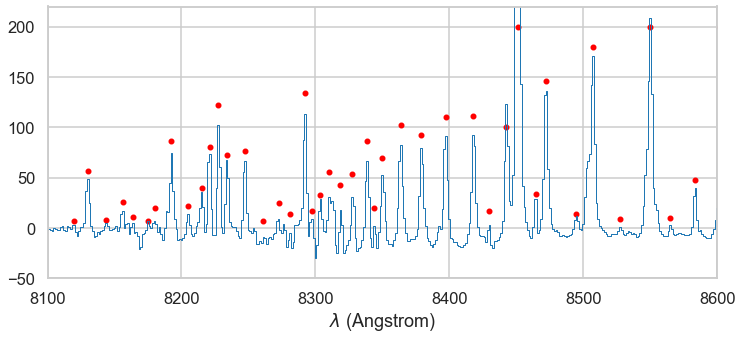

In [128]:
fig, ax = plt.subplots(figsize=(12, 5))
Spectrum(data=spec_yso, wave=cube.wave).plot()
ymax=200
ax.scatter(wave.coord()[peaks], np.minimum(ymax, props["prominences"]), marker=".", color="r")
ax.set_ylim(-50, ymax * 1.1)
ax.set_xlim(8100, 8600)
...;

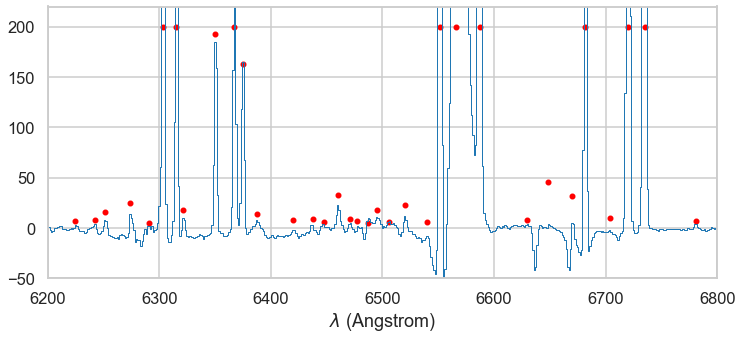

In [129]:
fig, ax = plt.subplots(figsize=(12, 5))
Spectrum(data=spec_yso, wave=cube.wave).plot()
ymax=200
ax.scatter(wave.coord()[peaks], np.minimum(ymax, props["prominences"]), marker=".", color="r")
ax.set_ylim(-50, ymax * 1.1)
ax.set_xlim(6200, 6800)
...;

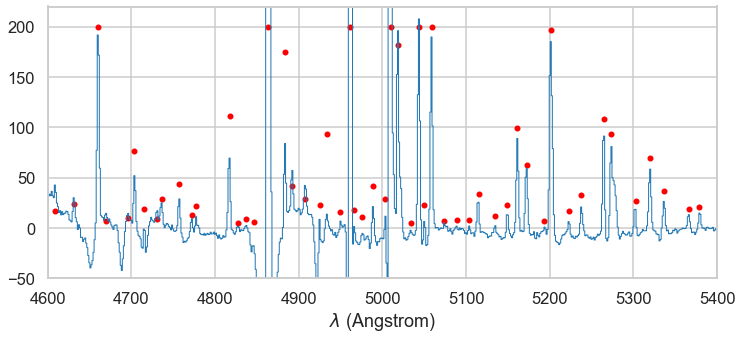

In [130]:
fig, ax = plt.subplots(figsize=(12, 5))
Spectrum(data=spec_yso, wave=cube.wave).plot()
ymax=200
ax.scatter(wave.coord()[peaks], np.minimum(ymax, props["prominences"]), marker=".", color="r")
ax.set_ylim(-50, ymax * 1.1)
ax.set_xlim(4600, 5400)
...;

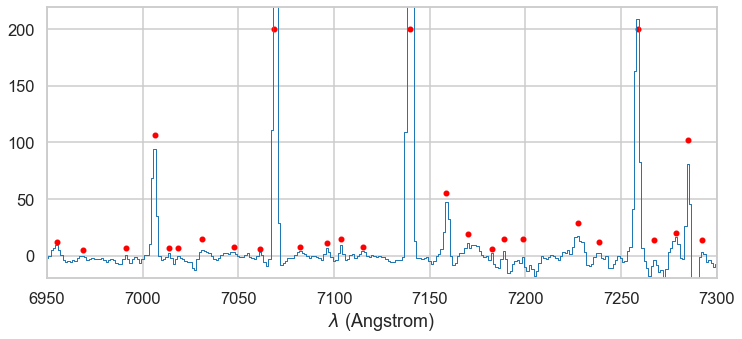

In [131]:
fig, ax = plt.subplots(figsize=(12, 5))
Spectrum(data=spec_yso, wave=cube.wave).plot()
ymax=200
ax.scatter(wave.coord()[peaks], np.minimum(ymax, props["prominences"]), marker=".", color="r")
ax.set_ylim(-0.1 * ymax, ymax * 1.1)
ax.set_xlim(6950, 7300)
...;

In [133]:
peaks_all, props_all = si.find_peaks(spec_all, prominence=0.3, distance=4)

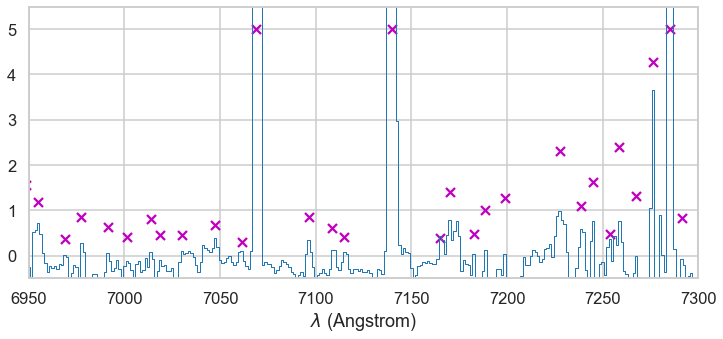

In [134]:
fig, ax = plt.subplots(figsize=(12, 5))
Spectrum(data=spec_all, wave=cube.wave).plot()
ymax=5
ax.scatter(wave.coord()[peaks_all], np.minimum(ymax, props_all["prominences"]), marker="x", color="m")
ax.set_ylim(-0.1 * ymax, ymax * 1.1)
ax.set_xlim(6950, 7300)
...;

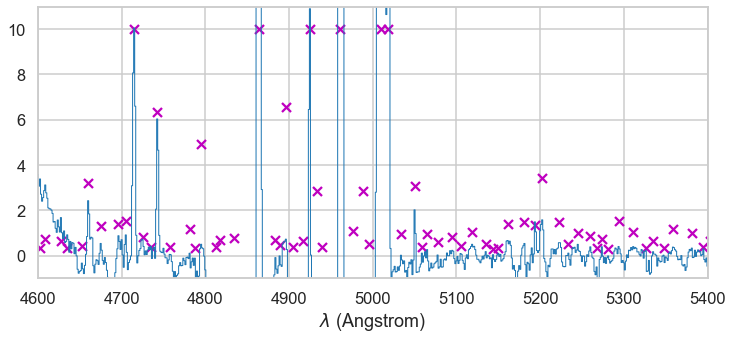

In [135]:
fig, ax = plt.subplots(figsize=(12, 5))
Spectrum(data=spec_all, wave=cube.wave).plot()
ymax=10
ax.scatter(wave.coord()[peaks_all], np.minimum(ymax, props_all["prominences"]), marker="x", color="m")
ax.set_ylim(-0.1 * ymax, ymax * 1.1)
ax.set_xlim(4600, 5400)
...;

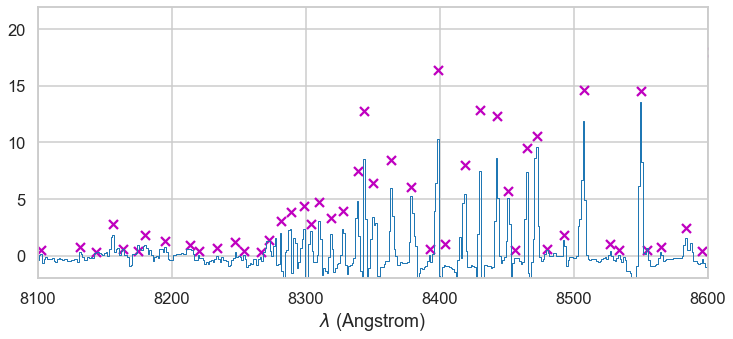

In [136]:
fig, ax = plt.subplots(figsize=(12, 5))
Spectrum(data=spec_all, wave=cube.wave).plot()
ymax=20
ax.scatter(wave.coord()[peaks_all], np.minimum(ymax, props_all["prominences"]), marker="x", color="m")
ax.set_ylim(-0.1 * ymax, ymax * 1.1)
ax.set_xlim(8100, 8600)
...;

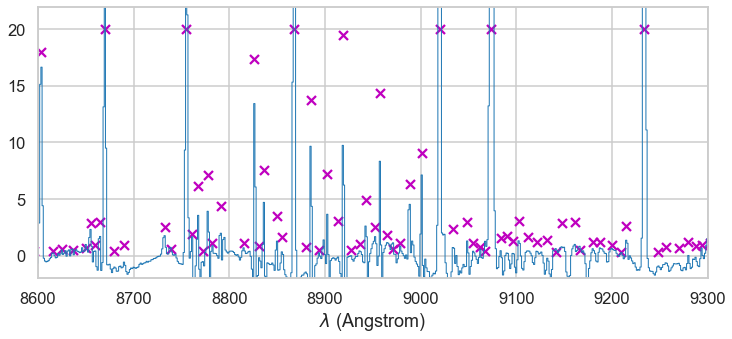

In [137]:
fig, ax = plt.subplots(figsize=(12, 5))
Spectrum(data=spec_all, wave=cube.wave).plot()
ymax=20
ax.scatter(wave.coord()[peaks_all], np.minimum(ymax, props_all["prominences"]), marker="x", color="m")
ax.set_ylim(-0.1 * ymax, ymax * 1.1)
ax.set_xlim(8600, 9300)
...;

In [138]:
props_all['prominences']

array([3.18124792e-01, 7.15473848e-01, 6.51498814e-01, 3.38735208e-01,
       4.46284876e-01, 3.21717626e+00, 1.29856963e+00, 1.39188395e+00,
       1.53237139e+00, 1.44286049e+01, 8.36720450e-01, 3.75643603e-01,
       6.35513540e+00, 4.03961253e-01, 1.17038038e+00, 3.18485715e-01,
       4.91537974e+00, 3.95965630e-01, 6.92923985e-01, 7.87848412e-01,
       2.13898074e+03, 6.93931319e-01, 4.61898666e-01, 6.55376492e+00,
       3.78602877e-01, 6.32411013e-01, 2.02454235e+01, 2.86981785e+00,
       3.95886163e-01, 2.88334188e+03, 1.07812027e+00, 2.85105532e+00,
       5.06989501e-01, 8.75569880e+03, 3.33874451e+01, 9.59918677e-01,
       3.08485560e+00, 3.99617777e-01, 9.35987140e-01, 5.81602020e-01,
       8.44485343e-01, 4.46960722e-01, 1.03377485e+00, 4.92987723e-01,
       3.00895161e-01, 3.41051040e-01, 1.40975697e+00, 1.47696448e+00,
       1.35494018e+00, 3.41024254e+00, 1.50251061e+00, 5.32480876e-01,
       9.87240833e-01, 8.50409114e-01, 3.43299466e-01, 7.35716396e-01,
      

In [139]:
import pandas as pd

In [140]:
df = pd.DataFrame(props_all, index=wave.coord()[peaks_all])
df

,prominences,left_bases,right_bases
4602.444824,0.318125,1,71
4608.694824,0.715474,4,71
4627.444824,0.651499,18,44
4634.944824,0.338735,26,44
4652.444824,0.446285,39,44
...,...,...,...
9312.444824,10.626385,3716,3772
9317.444824,9.084161,3772,3777
9323.694824,15.171211,3772,3780
9337.444824,6.332023,3780,3792
